# Implementando SVM para Dados Sintéticos

### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
%matplotlib inline

### Importando os Dados

In [2]:
DATAPATH_1 = ('ex6data1.mat')
DATAPATH_2 = ('ex6data2.mat')
DATAPATH_3 = ('ex6data3.mat')

### Definindo uma Função para Plotar os Dados

In [3]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (14., 8.)
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

### Split dos Dados 

In [4]:
data1 = loadmat(DATAPATH_1)

X = data1['X']
y = data1['y']

### Plotando os Dados em um Plano Cartesiano

Inicio com dados simplificados com um limite linear claro entre os dados para treinamento.

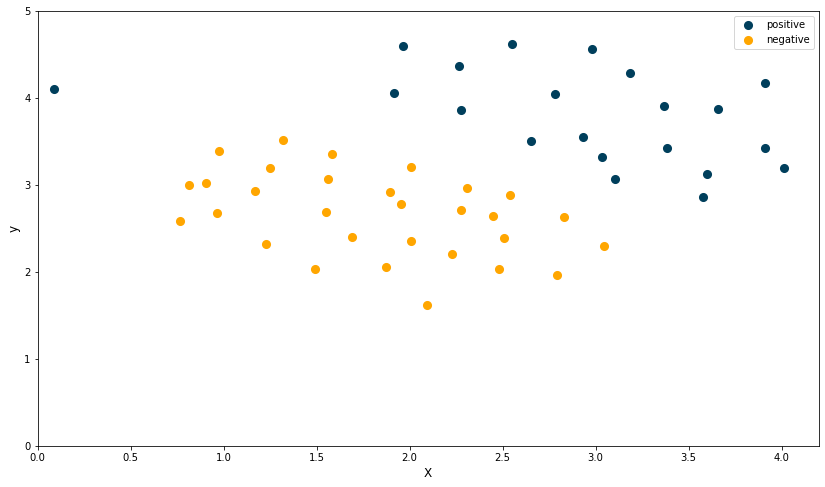

In [5]:
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

### Aplicando SVM com Regularização Pequena (C=1)

Implementação do SVM de maneria otimizada conforme documentação oficial __[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__. Para esta classificação, será utilizado o Kernel linear básico, parametrizado no algoritmo, uma vez que o default é o 'rbf' (Radial Basis Function).

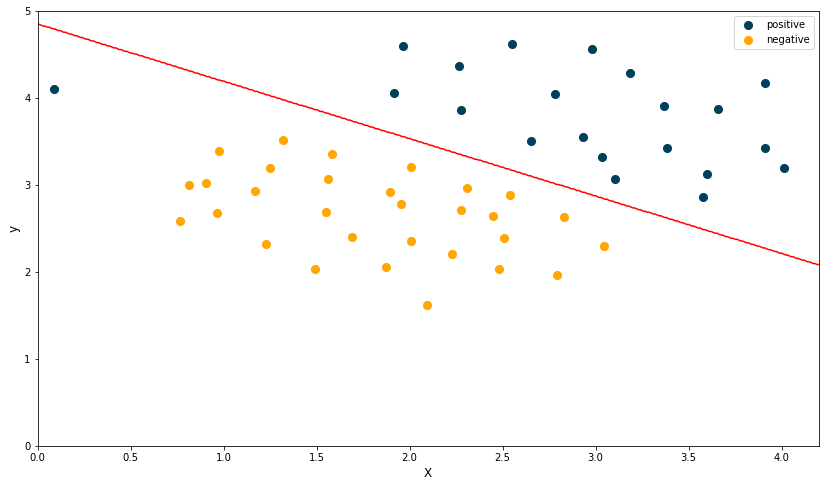

In [6]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear' , C=1.0)
clf.fit(X, y.ravel())

plot_data(X , y , 'X' , 'y' , 'positive' , 'negative' , 0, 4.2 , 0 ,5)

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='r')

### Aplicando SVM com Regularização Grande (C=100)

Alterando o limite de decisão para 100, o modelo vai para um Overfit sobre os dados de treinamento. 

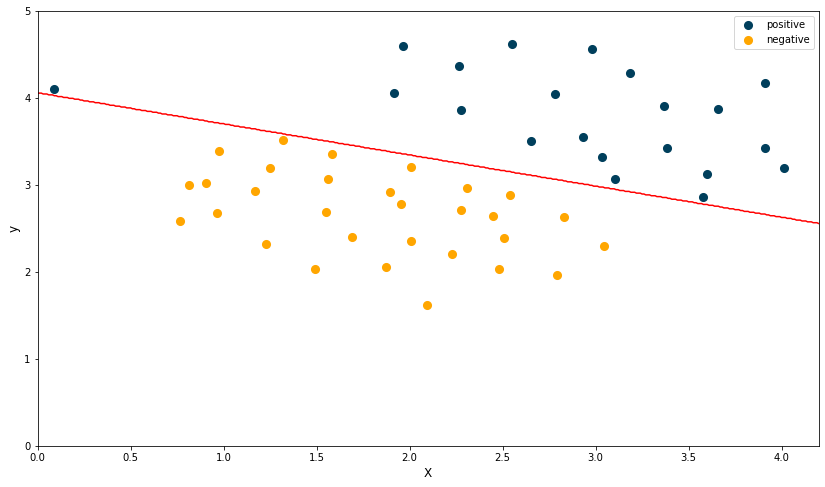

In [7]:
#Use C=100
clf100 = svm.SVC(kernel='linear', C=100.0)
clf100.fit(X, y.ravel())

#Plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#Plot hyperplane

x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf100.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='r')

### Superfície de Separação não Linear

A seguir, veremos um conjunto de dados que não pôde ser linearmente separável. Aqui é onde os kernels entram em cena para fornecer a funcionalidade de um classificador não linear. Para mais detalhes sobre o conceito de Kernels, acesse o artigo [Understanding the kernel trick](https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78) para uma compreensão da intuição matemática. 

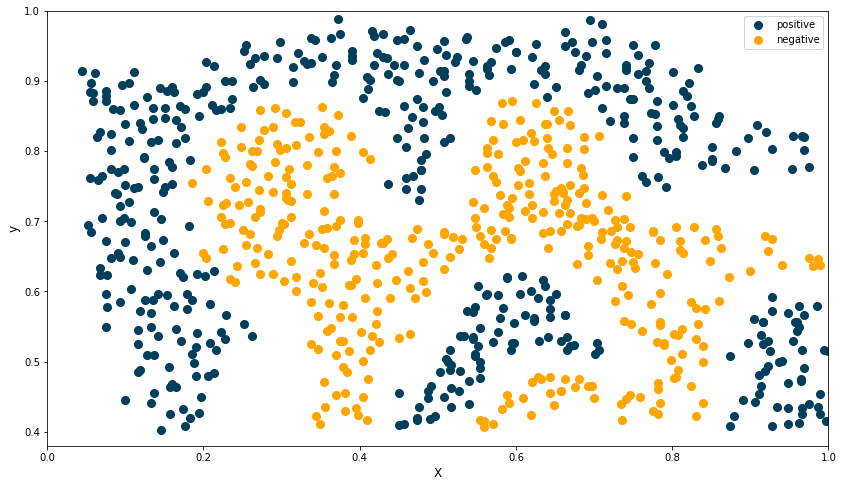

In [9]:
data2 =loadmat(DATAPATH_2)

X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2 , y_2 , 'X', 'y', 'positive' ,'negative',0,1.0,0.38,1
        )

### Implementando SVM com Kernel Gaussiano

Para esta parte da tarefa, foi solicitado a utilização da função gaussianKernel para auxiliar na implementação do SVM com kernels gaussianos. O SVC contém sua própria implementação de kernel gaussiano na forma de função de base radial (rbf). Para uma descriçao da função 'rbf' acesse o artigo [Radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel).

\begin{equation*}
K_{gaussian} (x^{(i)},x^{(j)}) = exp \left( - \frac{\parallel x^{(i)} - x^{(j)} \parallel^2}{ 2 \sigma^2 } \right) = exp \left( - \frac{\sum_{k=1}^{n} (x_k^{(i)} - x_k^{(i)})^2}{2 \sigma^2} \right)
\end{equation*}

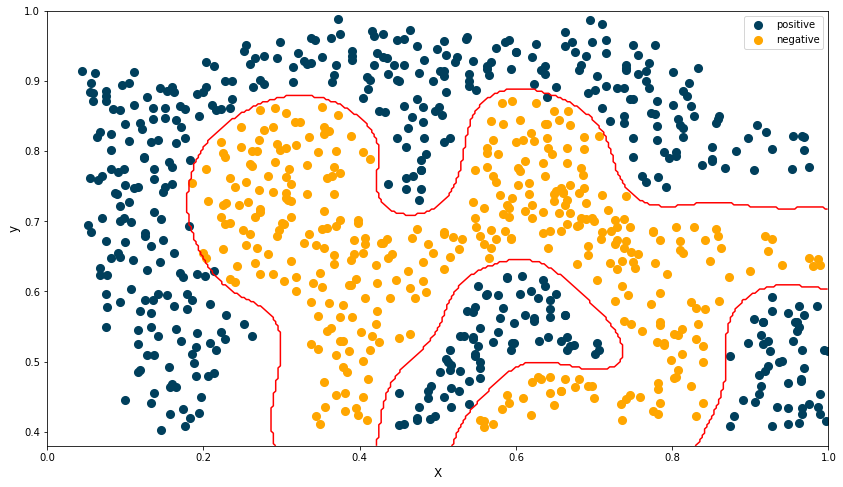

In [10]:
sigma = 0.05
gamma = 1/(2*sigma**2)

clfg = svm.SVC(kernel='rbf' , gamma=gamma,C=1.0)
clfg.fit(X_2,y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='r')

---------------
# Prática Regressão Logística e KNN


## Exemplo Brest Cancer - Let's save some lives

vamos trabalhar com o Breast Cancer Dataset. Ao invés de fazer o download, vamos aproveitar o módulo datasets do scikit! Esse dataset contém 30 atributos e 2 possíveis outcomes: M (Malign) ou B (Benign). Nossa tarefa será, a partir dos features, conseguir prever o tipo de tumor de cada paciente. Vamos primeiro fazer o loading do dataset:


## Importando as bibliotecas

In [11]:
# importando as bilbiotecas
import seaborn as sns

# importando a biblioteca scikit-learn dataset
from sklearn import datasets

# carregando o DataSet
cancer = datasets.load_breast_cancer()

## Carregando e verificando os dados

Use as células abaixo para explorar o dataset. Recomendo usar os atributos `.feature_names`, `.target_names` e `.data.shape` para ter um entendimento complementar do dataset além dos métodos exploratórios que ja vimos (`.info()`, `.head()`, `.describe()`. Para utilizar os métodos exploratórios, precisaremos converter nossos dados para um *Pandas DataFrame*. Para isso, utilize `pd.DataFrame.from_dict()`...mas na real que não é necessário nessa aula.

In [13]:

cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
cancer.data.shape

(569, 30)

In [16]:
cancer.target.shape

(569,)

In [17]:
import collections

collections.Counter(cancer.target)

Counter({0: 212, 1: 357})

## Separando os dados em treino e teste

Ok, agora precisamos realizar o `train_test_split` dos nossos dados, uma vez que voltamos a realizar aprendizado supervisionado.Vamos fazer um split 80-20. Na célula abaixo, realize o train-test-split criando 4 variáveis: X_train, X_test, y_train, y_test. Para reproducibilidade, vamos no tradicional random_state de 42, já que é a resposta para tudo, e com test_size = 0.2. Para documentação oficial clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [18]:
from  sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=42)

In [19]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Rodando o classificador de Machine Learning - Regressão Logística

Com nosso dados de treino e test, estamos prontos para aplicar nossos métodos de classificação! Vamos implementar uma logística e observar os resultados segundo as métricas que discutimos mais acima. Utiliza os parâmetros `dual` com False e `max_iter` com 5000 para evitar erros de convergência. Para documentação oficial clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [20]:
#importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# instanciando o modelo classificador (clf)
clf = LogisticRegression(max_iter=5000)

# ajustando o modelo com os dados de treino
clf.fit(X_train, y_train)

# fazendo predições para os dados de teste
y_pred = clf.predict(X_test)

## Medindo os resultados

Vamos montar a matriz de confusão dados os outputs do modelo e nossos targets. Para tal, importe o módulo `metrics` do scikit e crie uma variável cnf_matrix que recebe `metrics.confusion_matrix()`. Essa classe __[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__ recebe 2 argumentos: `y_test` e `y_pred`. Por fim, faça o `print()` da matriz!

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39,  4],
       [ 1, 70]], dtype=int64)

Parece então que temos 39 TN, 4 FP, 1 FN e 70 TP. Vamos puxar as métricas accuracy, precision e recall chamando os respectivos métodos de `metrics`. Eles são `.accuracy_score()`, `.precision_score()` e `.recall_score()`. Todos eles recebem 2 argumentos: y_test e y_pred. Faça o print das 3 métricas. Para documentação oficial acesse [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Para saber como aplicar as métricas acesse [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [23]:
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred))
print("Precision:" , metrics.precision_score(y_test, y_pred))
print("Recall:" , metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465


Nossas 3 métricas estão top-notch, todas acima de 90%. Essa é a maneira artesanal de fazer um classificador. Vamos para algo mais profissional 



## Rodando o classificador de Machine Learning - KNN

Vamos agora implemntar o KNN. Para acesso a documentação oficial [clique aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [25]:
#implementanto do KNN
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## aplicando o KNN nos dados de treino

In [26]:
y_pred_train = knn.predict(X_train)
cnf_matrix = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix

array([[147,  22],
       [  5, 281]], dtype=int64)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Precision:",metrics.precision_score(y_train, y_pred_train))
print("Recall:",metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.9406593406593406
Precision: 0.9273927392739274
Recall: 0.9825174825174825


## aplicando o KNN para dados de teste


In [28]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  5],
       [ 0, 71]], dtype=int64)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0


----------------

# Exemplo Diabetes - Let's save some lives again

Para esse exercício, usaremos o __[dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__ de diabetes Pima Indians. 

## Lendo e verificando os dados

In [30]:
pima = pd.read_csv("diabetes.csv")

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Verificando o balanceamento da variável target

Parece que temos 1 para casos positivos de diabetes e 0 para casos negativos. Na célula abaixo, vamos realizar um `.groupby()` em label seguido de um `.count()` para checar se nosso dataset está balanceado.

In [32]:
pima.groupby('label').glucose.count()

label
0    500
1    268
Name: glucose, dtype: int64

## Dividindo os dados em treino e teste

Ok, ele não está balanceado 50-50, mas pelo menos ele não está extremamente desbalanceado. Vamos seguir como ele está, observar os resultados e então decidir se vale a pena balancea-lo ou aplicar outras transformações. Abaixo, realize o train-test-split da mesma forma que o exercício anterior:

In [33]:
X = pima.drop('label', axis=1)
y=pima['label']

## Split dos Dados

Agora implemente o split de dados conforme a documentação oficial do [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), com test_size = 0.2 e random_state = 42

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Rodando o classificador básico e medindo os resultados

Vamos aplicar a Regressão logística da mesma maneira. Ao final da construção das predictions, já chame as 3 métricas básicas de classificação binária! Utiliza os mesmos códigos já aplicados anteriormente, com os hiperparâmentros da regressão logística `dual` com False e `max_iter` com 5000.

In [37]:
clf = LogisticRegression(dual=False, max_iter=5000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727


## Plotando a curva ROC

Ok, dessa vez nossos resultados não deram tão certo...será que a regressão logística está realizando seu trabalho? Podemos observar isso pelo plot da curva ROC:

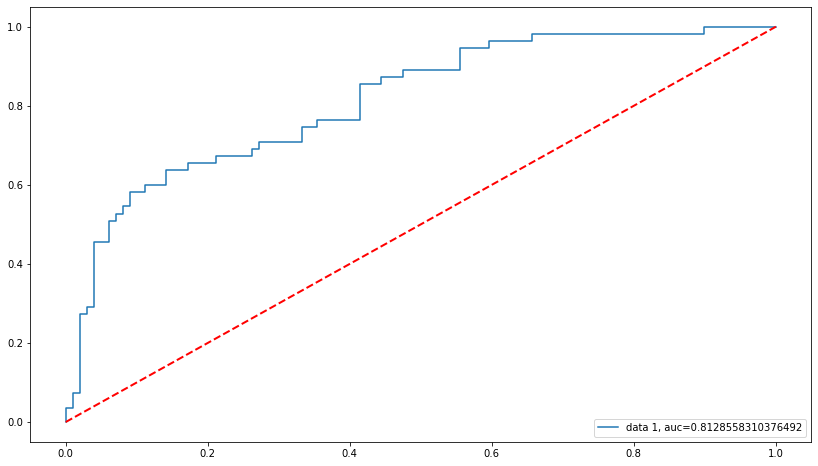

In [38]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

------------

# Rodando outros classificadores de Machine Learning

É....os resultados estão "meh". Uma coisa que podemos fazer é resolver esse problema na força bruta: puxar um monte de modelos, testar no nosso dataset e ver o que se sai melhor. Isso parece meio burro, mas realmente fazemos isso no nosso dia-a-dia: por que testar um modelo se podemos testar vários ao mesmo tempo?

In [39]:
# importando as bibliotecas dos modelos classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# definindo uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(max_iter=5000),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.6623376623376623
Precision: 0.5245901639344263
Recall: 0.5818181818181818
GaussianNB
****Results****
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
LogisticRegression
****Results****
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
SVC
****Results****
Accuracy: 0.7662337662337663
Precision: 0.7209302325581395
Recall: 0.5636363636363636
DecisionTreeClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6349206349206349
Recall: 0.7272727272727273
RandomForestClassifier
****Results****
Accuracy: 0.7532467532467533
Precision: 0.6545454545454545
Recall: 0.6545454545454545
GradientBoostingClassifier
****Results****
Accuracy: 0.7402597402597403
Precision: 0.6271186440677966
Recall: 0.6727272727272727
